# mengenal autoendcoder 
sumber : https://medium.com/@samuelsena/pengenalan-deep-learning-part-6-deep-autoencoder-40d79e9c7866 <br>
Autoendcoder adalah model Neural Network yang input dan output yang sama, ia mempelajari bagaimana merekonstruksi terhadap data input. adapun kegunaannya adalah untuk mengurangi dimensi data feature (dimensionality reduction).

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Activation, Dense
from tensorflow.keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [2]:
#load data -> download and save mnist data 
(train_x,train_y),(test_x,test_y) = mnist.load_data()

#scale data dari 0 sampai 1 saja dikarenakan data yang telah di load memiliki range yang cukup besar untuk learning rate yang kecil 
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255. #=> data awalnya punya dimensi 255 @1 dimensi adalah 28*28

#setalah di scale data di ubah menjadi 784 vektor

train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

In [11]:
# Download and Save MNIST Dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Scale from 0 to 1
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Reshape from 28x28 matrix to 784 vector
train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

## membuat autoendcoder 
### sigmoid dan cross-entropy

In [ ]:
#target dimensi pada code layer
TARGET_DIM = 16

#endcoder
#inputs = input(shape=(784,))
inputs = Input(shape=(784,))
h_endcode = Dense(256, activation='relu')(inputs)
h_endcode = Dense(128, activation='relu')(h_endcode)
h_endcode = Dense(64, activation='relu')(h_endcode)
h_endcode = Dense(32, activation='relu')(h_endcode)

#code layer
code_layer = Dense(TARGET_DIM, activation='relu')(h_endcode)

#decoder 
h_decode = Dense(32, activation='relu')(code_layer)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='sigmoid')(h_decode)

#autoendcoder 
autoendcoder = Model(inputs = inputs, outputs = outputs)

#encoder model
code_layers = Model(inputs= inputs, outputs = code_layer)

#optimizer menggunakan ADAM / update relu
adam = Adam(lr=0.001)

#compile model binary cross-entropy
autoendcoder.compile(optimizer=adam, loss='binary_crossentropy')

#train and save weight
autoendcoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, shuffle=True, validation_data= (test_x, test_x))
autoendcoder.save_weights('result_weight.h5')



### Linear & Mean Square Error

In [ ]:
TAGET_DIM = 16

#endcoder
#inputs = input(shape=(784,))
inputs = Input(shape=(784,))
h_endcode = Dense(256, activation='relu')(inputs)
h_endcode = Dense(128, activation='relu')(h_endcode)
h_endcode = Dense(64, activation='relu')(h_endcode)
h_endcode = Dense(32, activation='relu')(h_endcode)

#code layer
encode = Dense(TARGET_DIM, activation='relu')(h_endcode)

#decoder 
h_decode = Dense(32, activation='relu')(encode)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='linear')(h_decode)

#autoencoder model 
autoendcoder = Model(inputs=inputs, outputs = outputs)

#encode model 
encode_model = Model(inputs = inputs, outputs = encode)

#optimizer
adams = Adam(learning_rate=0.001)

#compile MSE model
autoendcoder.compile(optimizer=adams, loss='mse')

#training data
autoendcoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, shuffle=True, validation_data=(test_x, test_x))

#save models
autoendcoder.save_weights('result_weight_linear.h5')




### reconstruction result

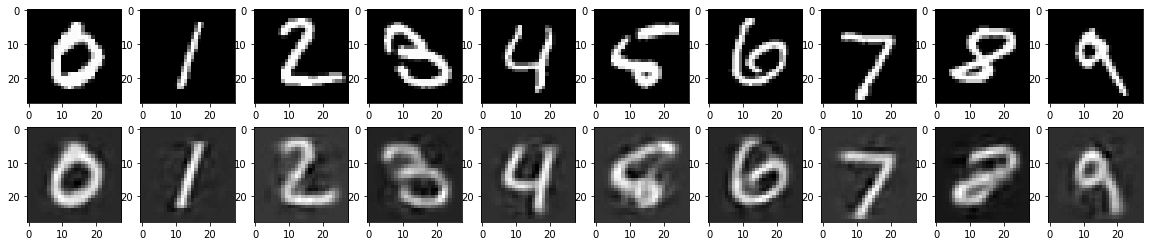

In [26]:
#endcoded data
endcoded_train = code_layers.predict(train_x)
endcoded_test  = code_layers.predict(test_x)

#reconstructed data 
recostructed_data = autoendcoder.predict(test_x)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    count = 0
    while True:
        if i == test_y[count]:
            #original 
            ax = plt.subplot(2, n, i+1)
            plt.imshow(test_x[count].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(True)
            ax.get_yaxis().set_visible(True)

            #reconstructed
            ax = plt.subplot(2, n, i+1+n)
            plt.imshow(recostructed_data[count].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(True)
            ax.get_yaxis().set_visible(True)
            break;

        count += 1
plt.show()



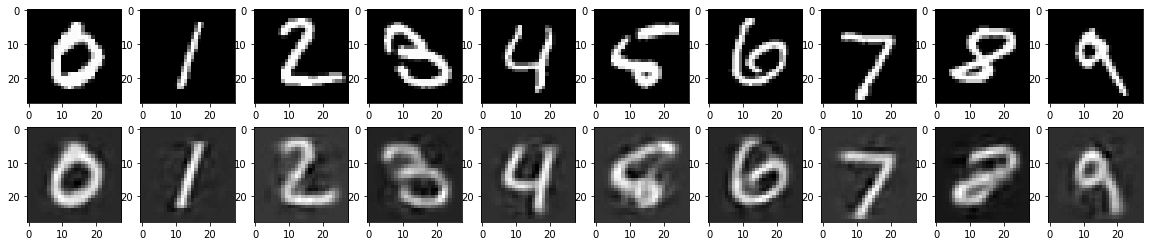

In [28]:
# Encoded Data
encoded_train = encode_model.predict(train_x)
encoded_test = encode_model.predict(test_x)

# Reconstructed Data
reconstructed = autoendcoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
	count = 0
	while True:
		if i == test_y[count]:
			# Original
			ax = plt.subplot(2, n, i + 1)
			plt.imshow(test_x[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(True)
			ax.get_yaxis().set_visible(True)

			# Reconstructed
			ax = plt.subplot(2, n, i + 1 + n)
			plt.imshow(reconstructed[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(True)
			ax.get_yaxis().set_visible(True)
			break;

		count += 1
plt.show()

C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
235/235 [==============================] - 8s 29ms/step - loss: 0.2623 - val_loss: 0.1924
Epoch 2/100
235/235 [==============================] - 6s 26ms/step - loss: 0.1704 - val_loss: 0.1551
Epoch 3/100
235/235 [==============================] - 6s 27ms/step - loss: 0.1507 - val_loss: 0.1445
Epoch 4/100
235/235 [==============================] - 6s 26ms/step - loss: 0.1421 - val_loss: 0.1390
Epoch 5/100
235/235 [==============================] - 6s 26ms/step - loss: 0.1374 - val_loss: 0.1354
Epoch 6/100
235/235 [==============================] - 7s 32ms/step - loss: 0.1330 - val_loss: 0.1308
Epoch 7/100
235/235 [==============================] - 7s 28ms/step - loss: 0.1291 - val_loss: 0.1275
Epoch 8/100
235/235 [==============================] - 7s 29ms/step - loss: 0.1265 - val_loss: 0.1252
Epoch 9/100
235/235 [==============================] - 7s 30ms/step - loss: 0.1246 - val_loss: 0.1242
Epoch 10/100
235/235 [==============================] - 7s 29ms/step - loss: 0.123

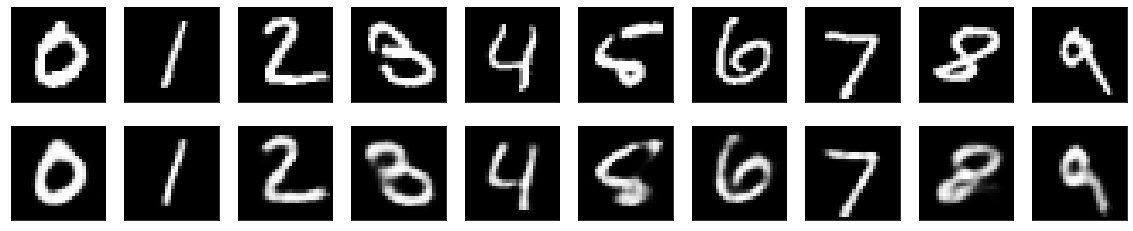

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Activation, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

# Download and Save MNIST Dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Scale from 0 to 1
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Reshape from 28x28 matrix to 784 vector
train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

# Target Dimension
TARGET_DIM = 16

# Encoder
inputs = Input(shape=(784,))
h_encode = Dense(256, activation='relu')(inputs)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)
h_encode = Dense(32, activation='relu')(h_encode)

# Coded
encoded = Dense(TARGET_DIM, activation='relu')(h_encode)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='sigmoid')(h_decode)

# Autoencoder Model
autoencoder = Model(inputs=inputs, outputs=outputs)

# Encoder Model
encoder = Model(inputs=inputs, outputs=encoded)

# Optimizer / Update Rule
adam = Adam(lr=0.001)

# Compile the model Binary Crossentropy
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')

# Train and Save weight
autoencoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, shuffle=True, validation_data=(test_x, test_x))
autoencoder.save_weights('weights.h5')

# Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Reconstructed Data
reconstructed = autoencoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
	count = 0
	while True:
		if i == test_y[count]:
			# Original
			ax = plt.subplot(2, n, i + 1)
			plt.imshow(test_x[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)

			# Reconstructed
			ax = plt.subplot(2, n, i + 1 + n)
			plt.imshow(reconstructed[count].reshape(28, 28))
			plt.gray()
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			break;

		count += 1
plt.show()